In [1]:
## Importing the libraries and functions that are needed


import os
import math
import warnings
import pandas as pd
import time
import random
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
##Importing the file and printing it

file = "X:/Career/Personal Projects/Greater-Toronto-Property-Costs/archive/filtered_toronto_property_data.xlsx"
data = pd.read_excel(file)
data

,price,region,address,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,"Ajax, ON","52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,"Ajax, ON","249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,"Ajax, ON","18 MONK CRES, Ajax, Ontario",3,3,0.899999
...,...,...,...,...,...,...
7319,1899000,"Scarborough, Toronto, ON","#MAIN UN -2977 LAWRENCE AVE E AVE, Toronto, On...",8,4,1.899000
7320,752880,"Scarborough, Toronto, ON","#406 -3220 SHEPPARD AVE E, Toronto, Ontario",2,2,0.752880
7321,1150000,"Scarborough, Toronto, ON","#902 -2799 KINGSTON RD, Toronto, Ontario",3,3,1.150000
7322,550000,"Scarborough, Toronto, ON","#506 -2201 KINGSTON RD, Toronto, Ontario",1,1,0.550000


In [3]:
## checking the missing

data.isna().sum()


price        0
region       0
address      0
bedrooms     0
bathrooms    0
pricem       0
dtype: int64

In [4]:
#pricefloat = float(price)
prices = data.pricem

(0.0, 6.0)

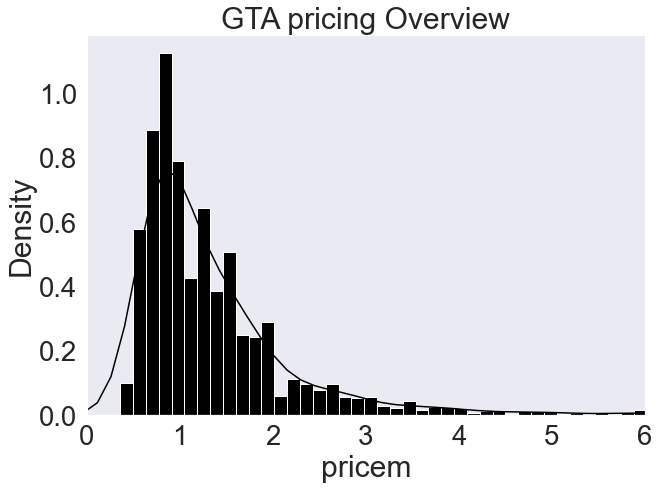

In [5]:
##showing the data in the form of graphs
sns.set(font_scale= 2.5)
sns.set_style('dark')
plt.figure(figsize= (10,7))
plt.title('GTA pricing Overview')
sns.distplot(prices, kde = True, color = 'black', hist_kws=dict(alpha=1), bins = 200)
plt.xlim(0,6)

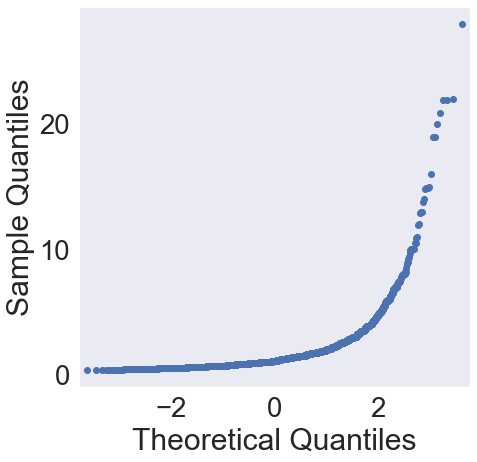

In [6]:
## Checking that if the data is evenly distributed. 
fig, ax = plt.subplots(figsize=(7,7))
fig = sm.qqplot(prices, ax = ax)

In [7]:
## taking the sample data as the data doesnt seems to be linear. 

sample_size = [15, 30, 50, 70, 100, 400]
samples = 500
np.random.seed(2)
all_means = []
for size in sample_size:
    means = []
    for index in range(0, samples):
        mean = np.mean(np.random.choice(prices.to_list(), size, replace = True))
        means.append(mean)
    all_means.append(means)

Text(0.5, 0, 'price')

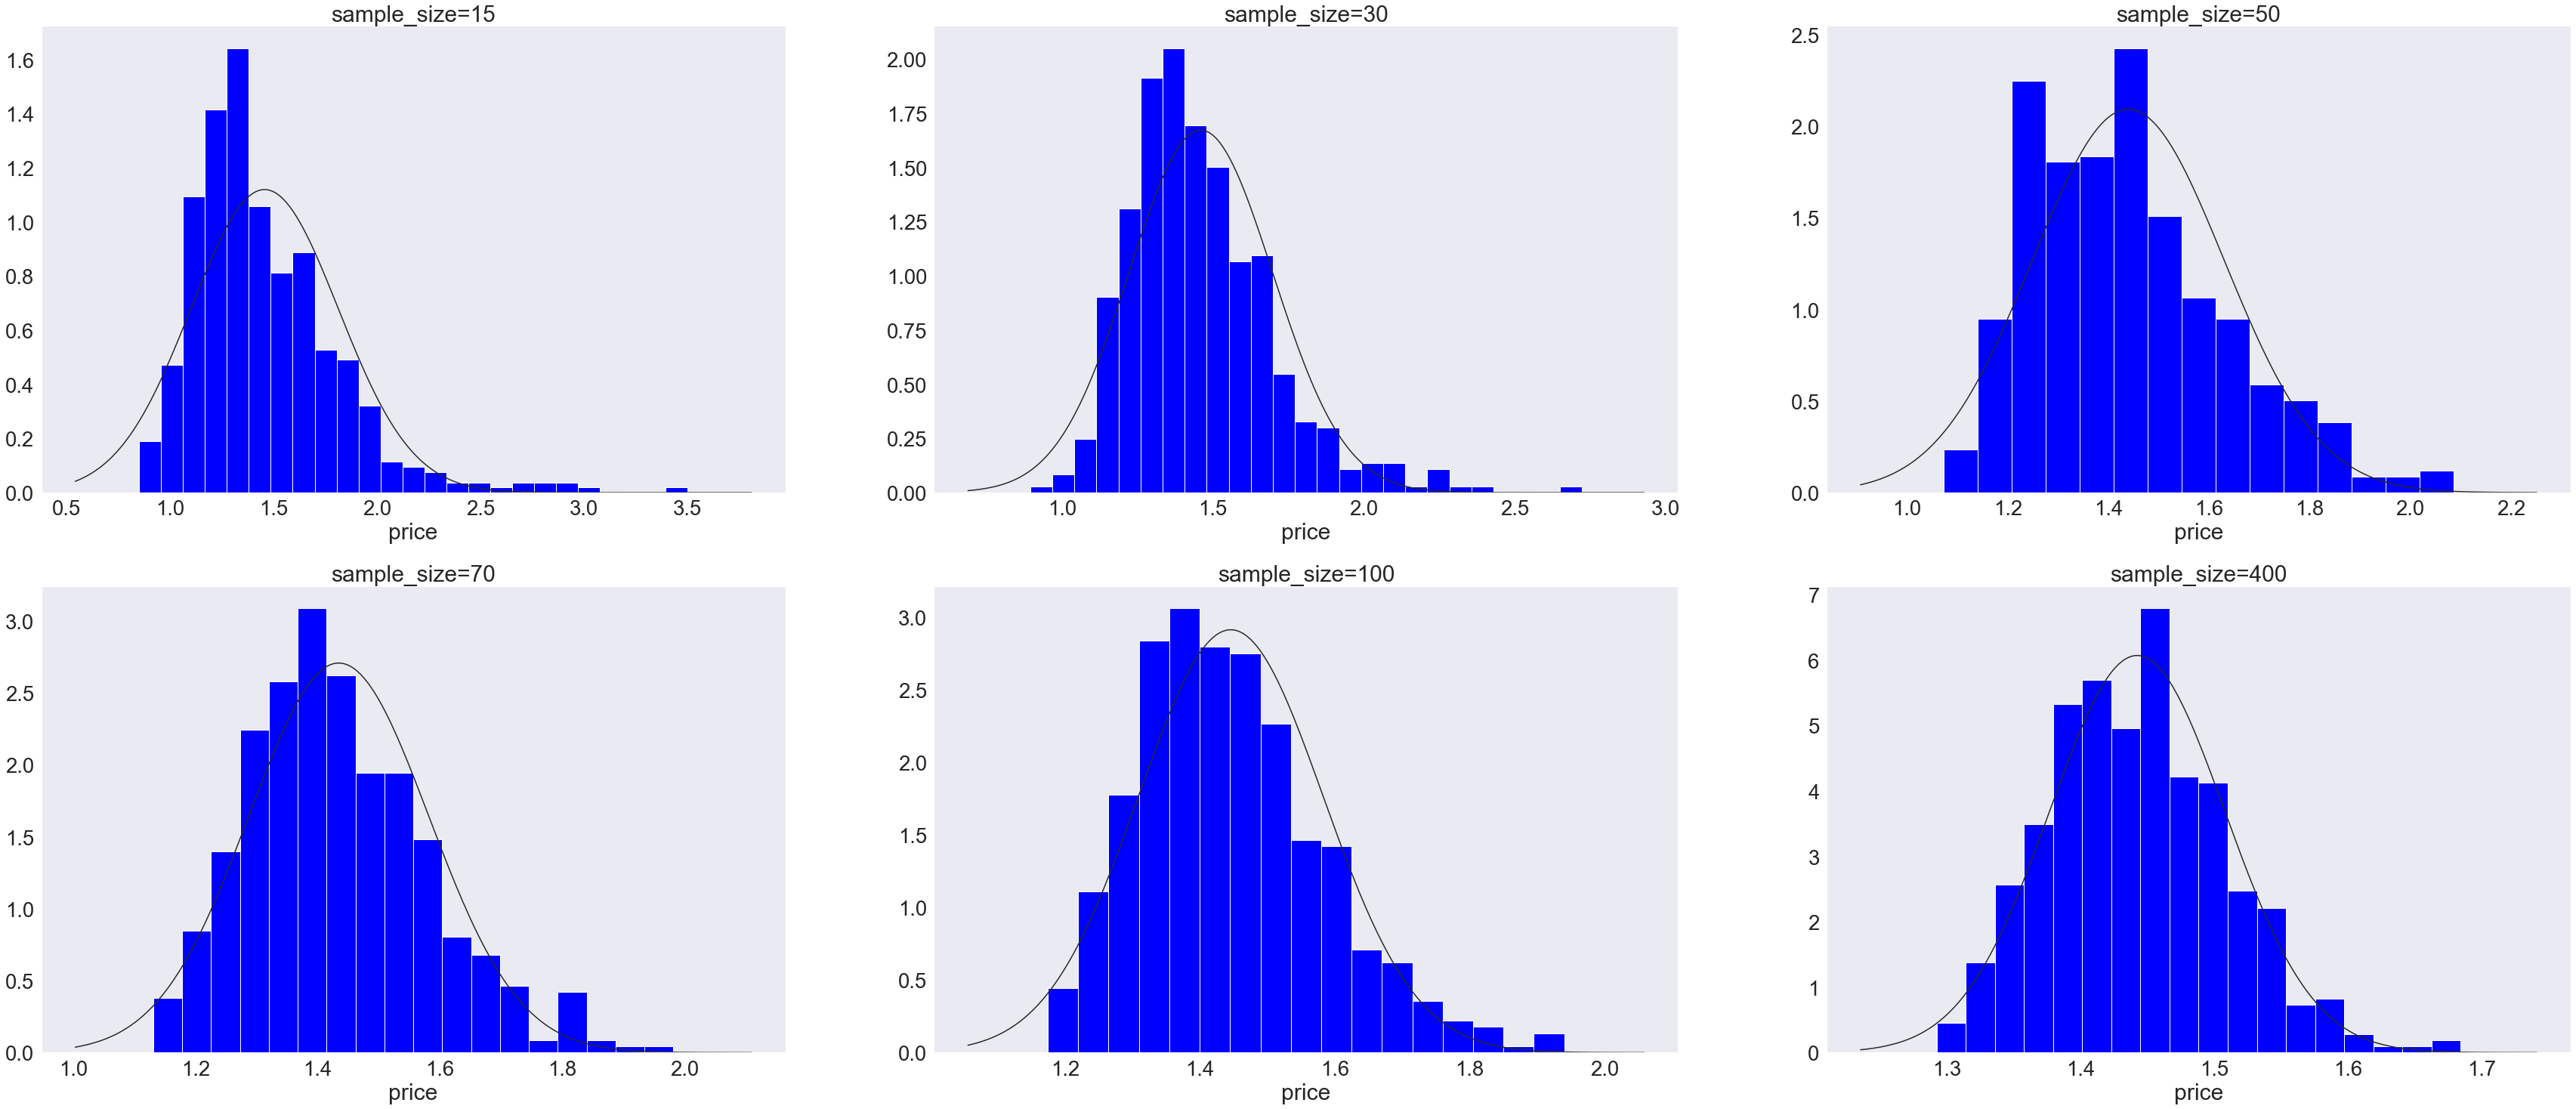

In [8]:
fig, axes = plt.subplots(2, 3, figsize = (60, 25))
sns.distplot(all_means[0], kde = False, color = 'blue', hist_kws=dict(alpha=1), ax = axes[0,0], fit = stats.norm)
axes[0, 0].set_title('sample_size=' +str(sample_size[0]))
axes[0, 0].set_xlabel('price')
sns.distplot(all_means[1], kde = False, color = 'blue', hist_kws=dict(alpha=1), ax = axes[0,1], fit = stats.norm)
axes[0, 1].set_title('sample_size=' +str(sample_size[1]))
axes[0, 1].set_xlabel('price')
sns.distplot(all_means[2], kde = False, color = 'blue', hist_kws=dict(alpha=1), ax = axes[0,2], fit = stats.norm)
axes[0, 2].set_title('sample_size=' +str(sample_size[2]))
axes[0, 2].set_xlabel('price')

#fig, axes = plt.subplots(1, 3, figsize = (30, 15))
sns.distplot(all_means[3], kde = False, color = 'blue', hist_kws=dict(alpha=1), ax = axes[1,0], fit = stats.norm)
axes[1, 0].set_title('sample_size=' +str(sample_size[3]))
axes[1, 0].set_xlabel('price')
sns.distplot(all_means[4], kde = False, color = 'blue', hist_kws=dict(alpha=1), ax = axes[1,1], fit = stats.norm)
axes[1, 1].set_title('sample_size=' +str(sample_size[4]))
axes[1, 1].set_xlabel('price')
sns.distplot(all_means[5], kde = False, color = 'blue', hist_kws=dict(alpha=1), ax = axes[1,2], fit = stats.norm)
axes[1, 2].set_title('sample_size=' +str(sample_size[5]))
axes[1, 2].set_xlabel('price')

Text(0.5, 1.0, 'sample_size=400')

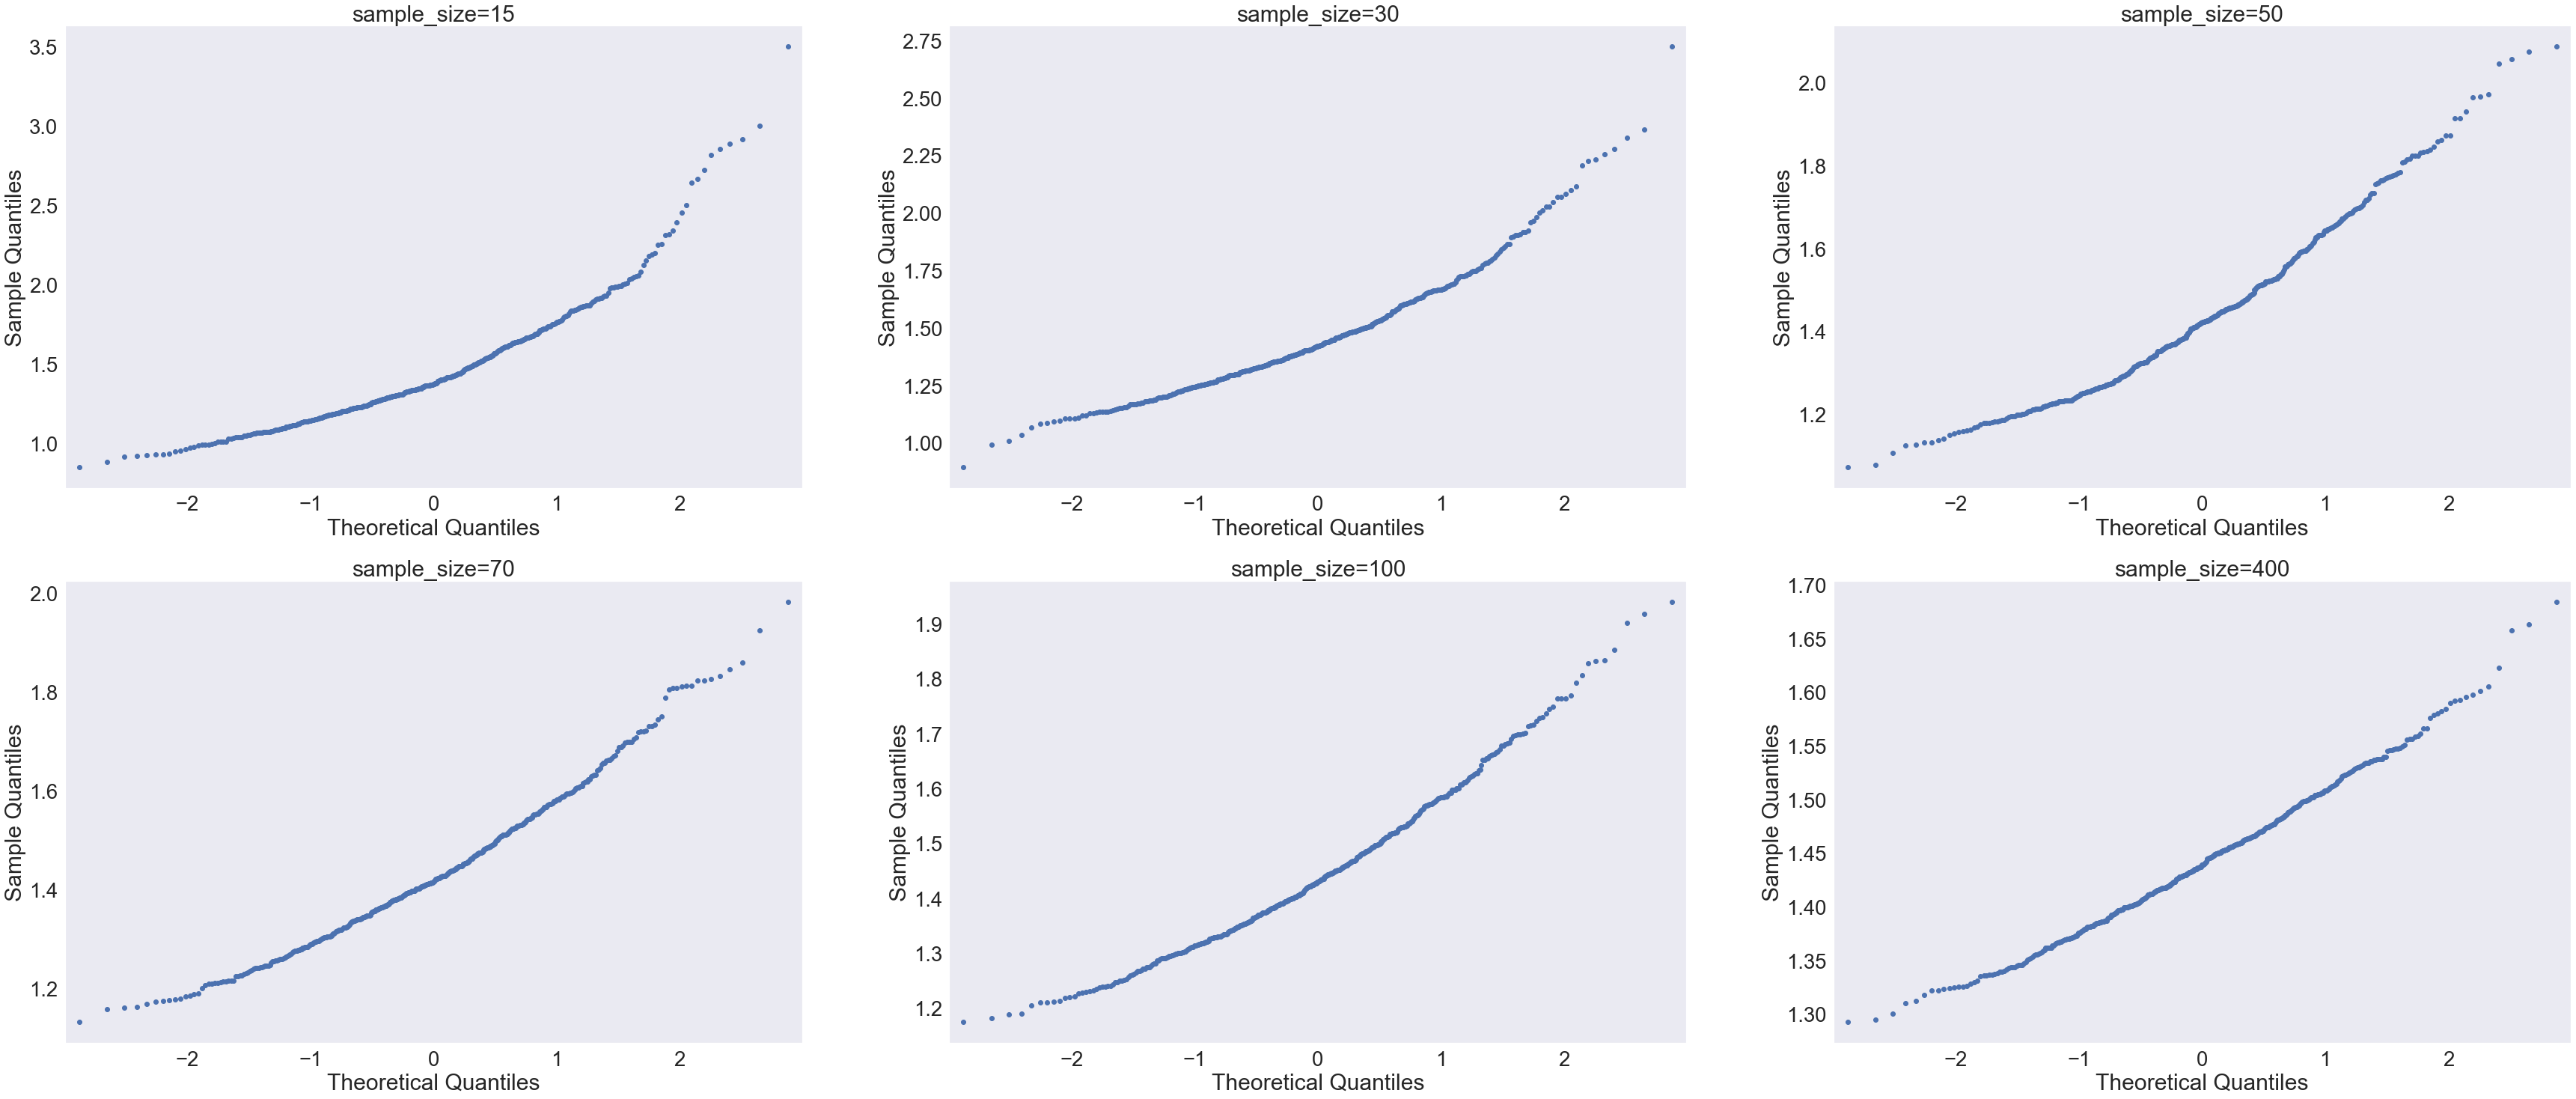

In [9]:
# means tends to go towards the normal distribution from sample 

fig, axes = plt.subplots(2, 3, figsize = (60, 25))
fig = sm.qqplot(np.array(all_means[0]), ax = axes[0, 0])
axes[0, 0].set_title('sample_size=' +str(sample_size[0]))
fig = sm.qqplot(np.array(all_means[1]), ax = axes[0, 1])
axes[0, 1].set_title('sample_size=' +str(sample_size[1]))
fig = sm.qqplot(np.array(all_means[2]), ax = axes[0, 2])
axes[0, 2].set_title('sample_size=' +str(sample_size[2]))
fig = sm.qqplot(np.array(all_means[3]), ax = axes[1, 0])
axes[1, 0].set_title('sample_size=' +str(sample_size[3]))
fig = sm.qqplot(np.array(all_means[4]), ax = axes[1, 1])
axes[1, 1].set_title('sample_size=' +str(sample_size[4]))
fig = sm.qqplot(np.array(all_means[5]), ax = axes[1, 2])
axes[1,2].set_title('sample_size=' +str(sample_size[5]))

Mean of GTA's property value


In [10]:
summary = pd.DataFrame({
    'Sample size (n)' : [],
    'Population mean (µ)' : [],
    'Population std. dev. (σ)': [],
    'Sample mean (µ_bar)' : [],
    'σ_bar = Std. dev. of n samples' : [],
    'estimated population std. dev. (σ_bar × √n)' : []
})
for index in range(0,6):
    summary_i = pd.DataFrame({
        'Sample size (n)' : [sample_size[index]],
        'Population mean (µ)' : [np.mean(prices)],
        'Population std. dev. (σ)': [np.std(prices)],
        'Sample mean (µ_bar)' : [np.mean(all_means[index])],
        'σ_bar = Std. dev. of n samples' : [np.std(all_means[index])],
        'estimated population std. dev. (σ_bar × √n)' : np.std(all_means[index])*math.sqrt(sample_size[index])
    })
    summary = pd.concat([summary, summary_i])
summary

,Sample size (n),Population mean (µ),Population std. dev. (σ),Sample mean (µ_bar),σ_bar = Std. dev. of n samples,estimated population std. dev. (σ_bar × √n)
0,15.0,1.444227,1.347433,1.456688,0.356239,1.379707
0,30.0,1.444227,1.347433,1.459763,0.238418,1.305867
0,50.0,1.444227,1.347433,1.439583,0.190556,1.347435
0,70.0,1.444227,1.347433,1.434454,0.147346,1.232782
0,100.0,1.444227,1.347433,1.445762,0.136799,1.367995
0,400.0,1.444227,1.347433,1.442437,0.065683,1.313662


The CLT indicates that the estimate value of Mean and Standard deviation are closer to actual value. 

Confidence Interval

In [11]:
zc = stats.norm.ppf(0.975)
zc

1.959963984540054

In [12]:
stats.norm.cdf(zc)-stats.norm.cdf(-zc)

0.95

In [13]:
#Calculating the confidence interval
summary = pd.DataFrame({
    'Sample size (n)' : [],
    'Population mean (µ)' : [],
    'Population std. dev. (σ)': [],
    'Sample mean (µ_bar)' : [],
    'σ_bar = Std. dev. of n samples' : [],
    'lower bound of confidence interval' : [],
    'upper bound of confidence interval' : []
})
for index in range(0,6):
    summary_i = pd.DataFrame({
        'Sample size (n)' : [sample_size[index]],
        'Population mean (µ)' : [np.mean(prices)],
        'Population std. dev. (σ)': [np.std(prices)],
        'Sample mean (µ_bar)' : [np.mean(all_means[index])],
        'σ_bar = Std. dev. of n samples' : [np.std(all_means[index])],
        'lower bound of confidence interval' : np.mean(all_means[index]) - zc*np.std(all_means[index]),
        'upper bound of confidence interval' : np.mean(all_means[index]) + zc*np.std(all_means[index])
    })
    summary = pd.concat([summary, summary_i])
summary

,Sample size (n),Population mean (µ),Population std. dev. (σ),Sample mean (µ_bar),σ_bar = Std. dev. of n samples,lower bound of confidence interval,upper bound of confidence interval
0,15.0,1.444227,1.347433,1.456688,0.356239,0.758473,2.154904
0,30.0,1.444227,1.347433,1.459763,0.238418,0.992473,1.927053
0,50.0,1.444227,1.347433,1.439583,0.190556,1.066100,1.813066
0,70.0,1.444227,1.347433,1.434454,0.147346,1.145662,1.723246
0,100.0,1.444227,1.347433,1.445762,0.136799,1.177640,1.713885
0,400.0,1.444227,1.347433,1.442437,0.065683,1.313701,1.571174


Note: Confidence gets smaller with larger sample size. 

Z-TEST:

In [14]:
z = np.mean(prices)
print('The population mean is:')
print(round(z, 4))
print('The population standard deviation is:')
sigma = np.std(prices)
print(round(sigma, 4))


The population mean is:
1.4442
The population standard deviation is:
1.3474


In [15]:
#GTA Regions
data.region.unique()

array(['Ajax, ON', 'Clarington, ON', 'Brock, ON', 'Oshawa, ON',
       'Pickering, ON', 'Scugog, ON', 'Uxbridge, ON', 'Whitby, ON',
       'Burlington, ON', 'Halton Hills, ON', 'Milton, ON', 'Oakville, ON',
       'Brampton, ON', 'Caledon, ON', 'Mississauga, ON', 'Aurora, ON',
       'East Gwillimbury, ON', 'Georgina, ON', 'King, ON', 'Markham, ON',
       'Newmarket, ON', 'Richmond Hill, ON', 'Vaughan, ON',
       'Whitchurch-Stouffville, ON', 'Old Toronto, Toronto, ON',
       'Hamilton, ON', 'Guelph, ON', 'Kitchener, ON', 'Cambridge, ON',
       'Brantford, ON', 'Scarborough, Toronto, ON'], dtype=object)

In [16]:
regions = ['Burlington, ON', 'Mississauga, ON', 'Vaughan, ON'] 
test_size = 50 
for region in regions:
    prices = data[data.region == region].pricem
    np.random.seed(5)
    test_sample = np.random.choice(prices, test_size)
    test_mean = np.mean(test_sample)
    
    print('x--------------------------------------------------------x------------------------------------------------x---------------------------------------x')
   
    print('Ramdonly selected sample Mean', test_size, 'from the',region[:-4], 'region is',round(test_mean, 4))
    z_score = (test_mean - z)*math.sqrt(test_size)/(sigma)
    if z_score < 0:
        p = 2*stats.norm.cdf(z_score) 
        print('The z-score is',round(z_score, 5))
        print('The corresponding p equal to',p)
        print('')
        if p < 0.05:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('Null Hypothesis denied.')
            print('The mean of the sample is different from the population mean.')
        else:
            print('In this case, p > 0.05 for the 95 percent confidence interval.')
            print('No evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')
    elif z_score == 0:
        p = stats.norm.cdf(0) 
        print('The z-score is',round(z_score, 5))
        print('The corresponding p value is', p)
        print('')
        if p < 0.025:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('Null Hypothesis rejected.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')
    else:
        p = 2*(1-stats.norm.cdf(z_score)) 
        print('The z-score is',round(z_score, 5))
        print('The corresponding p value is', p)
        print('')
        print('')
        if p < 0.05:
            print('In this case, p < 0.05 for the 95 percent confidence interval.')
            print('We reject the Null Hypothesis.')
            print('The mean of the sample is significantly different from the population mean.')
        else:
            print('In this case, p > 0.05 for the 95 percent confidence interval.')
            print('We have no evidence to reject the Null Hypothesis.')
            print('The mean of the sample is similar the population mean.')

x--------------------------------------------------------x------------------------------------------------x---------------------------------------x
Ramdonly selected sample Mean 50 from the Burlington region is 1.3562
The z-score is -0.4618
The corresponding p equal to 0.6442252439199045

In this case, p > 0.05 for the 95 percent confidence interval.
No evidence to reject the Null Hypothesis.
The mean of the sample is similar the population mean.
x--------------------------------------------------------x------------------------------------------------x---------------------------------------x
Ramdonly selected sample Mean 50 from the Mississauga region is 1.0977
The z-score is -1.81838
The corresponding p equal to 0.06900614963793043

In this case, p > 0.05 for the 95 percent confidence interval.
No evidence to reject the Null Hypothesis.
The mean of the sample is similar the population mean.
x--------------------------------------------------------x-------------------------------------

P-Values

In [17]:
testing = 50 
regions = data.region.unique()
frame = pd.DataFrame({'Region' : [], 'Sample mean' : [], 't-score' : [], 'p-value' : [], 'Null hypothesis': [], 'Alternative hypothesis' : []})
for region in regions:
    prices = data[data.region == region].pricem
    np.random.seed(5)
    random_test = np.random.choice(prices, testing)
    mean = np.mean(random_test)
    std = np.std(random_test)
    t_score, p = stats.ttest_1samp(a = random_test, popmean = z, alternative = 'two-sided')
    if p < 0.05: 
        Null_hypothesis = 'Reject',
        Alternative_hypothesis = 'Accept'
    else:
        Null_hypothesis = 'Accept',
        Alternative_hypothesis = 'Reject'
    frame_loop = pd.DataFrame({'Region' : region, 'Sample mean' : mean, 't-score' : t_score, 'p-value' : p, 'Null hypothesis' : Null_hypothesis, 'Alternative hypothesis' : Alternative_hypothesis})
    frame = pd.concat([frame, frame_loop])
print('Null hypothesis : The mean of the sample is similar to the population mean')
print('Alternative hypothesis : The mean of the sample is significantly different from the population mean')
print('The population mean is', round(z, 4))
frame.sort_values(by = 'Sample mean', ascending = False, inplace = True)
frame.reset_index(inplace = True)
frame.drop(columns = 'index', inplace = True)
frame

Null hypothesis : The mean of the sample is similar to the population mean
Alternative hypothesis : The mean of the sample is significantly different from the population mean
The population mean is 1.4442


,Region,Sample mean,t-score,p-value,Null hypothesis,Alternative hypothesis
0,"King, ON",3.557000,6.671520,2.141754e-08,Reject,Accept
1,"Caledon, ON",2.905322,3.596735,7.480376e-04,Reject,Accept
2,"Whitchurch-Stouffville, ON",2.760219,3.286739,1.878313e-03,Reject,Accept
3,"Aurora, ON",2.650845,2.979472,4.482971e-03,Reject,Accept
4,"Halton Hills, ON",2.220232,2.419729,1.928771e-02,Reject,Accept
5,"Richmond Hill, ON",2.117027,3.908864,2.848548e-04,Reject,Accept
6,"Oakville, ON",2.027478,3.965361,2.382930e-04,Reject,Accept
7,"East Gwillimbury, ON",1.998225,2.583693,1.280832e-02,Reject,Accept
8,"Markham, ON",1.856892,2.268104,2.776599e-02,Reject,Accept
9,"Milton, ON",1.711116,1.054748,2.967137e-01,Accept,Reject


T-Test for Null Hypothesis

In [18]:
def ttest(regions):
        price1 = data[data.region == regions[0]].pricem
        price2 = data[data.region == regions[1]].pricem
        print('The mean sample price from the',regions[0],'region is', round(np.mean(price1),3),'million dollars.')
        print('The mean sample price from the',regions[1],'region is', round(np.mean(price2),3),'million dollars.')
        print('x----------------------------------x------------------------------------------x-------------------x')
        print('')
        np.random.seed(5)
        sample1 = np.random.choice(price1, size = 50)
        sample2 = np.random.choice(price2, size = 50)
        t_score, p = stats.ttest_ind(a = sample1, b = sample2, alternative = 'two-sided')
        if p < 0.05:
                print('The t-score is',round(t_score, 5))
                print('The p value is', p)
                print('In this case, p < 0.05 for the 95 percent confidence interval.')
                print('We reject the Null Hypothesis.')
                print('The means of two samples are significantly different.')
        else:
                print('The t-score is',round(t_score, 5))
                print('The p value is', p)
                print('In this case, p > 0.05 for the 95 percent confidence interval.')
                print('We have no evidence to reject the Null Hypothesis.')
                print('two sample mean are .')

ttest(['Kitchener, ON', 'Brantford, ON'])

The mean sample price from the Kitchener, ON region is 0.838 million dollars.
The mean sample price from the Brantford, ON region is 0.87 million dollars.
x----------------------------------x------------------------------------------x-------------------x

The t-score is -0.51489
The p value is 0.6077880903104225
In this case, p > 0.05 for the 95 percent confidence interval.
We have no evidence to reject the Null Hypothesis.
two sample mean are .


In [19]:
#Checking the statistics of the data. 

data.describe()

,price,bedrooms,bathrooms,pricem
count,7.324000e+03,7324.000000,7324.000000,7324.000000
mean,1.444227e+06,3.062125,2.976106,1.444227
std,1.347525e+06,1.087886,1.401255,1.347525
min,3.590000e+05,0.000000,0.000000,0.359000
25%,7.997942e+05,2.000000,2.000000,0.799794
50%,1.099000e+06,3.000000,3.000000,1.099000
75%,1.599999e+06,4.000000,4.000000,1.599999
max,2.797500e+07,9.000000,15.000000,27.975000


In [20]:
data

,price,region,address,bedrooms,bathrooms,pricem
0,799000,"Ajax, ON","2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,"Ajax, ON","717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,"Ajax, ON","52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,"Ajax, ON","249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,"Ajax, ON","18 MONK CRES, Ajax, Ontario",3,3,0.899999
...,...,...,...,...,...,...
7319,1899000,"Scarborough, Toronto, ON","#MAIN UN -2977 LAWRENCE AVE E AVE, Toronto, On...",8,4,1.899000
7320,752880,"Scarborough, Toronto, ON","#406 -3220 SHEPPARD AVE E, Toronto, Ontario",2,2,0.752880
7321,1150000,"Scarborough, Toronto, ON","#902 -2799 KINGSTON RD, Toronto, Ontario",3,3,1.150000
7322,550000,"Scarborough, Toronto, ON","#506 -2201 KINGSTON RD, Toronto, Ontario",1,1,0.550000


In [21]:
## checking the data with atleast one bedroom and bathroom

data = data[data.bathrooms > 0]
data= data[data.bedrooms > 0]

In [22]:
## removing the ON from the region column

data["region"] = data["region"].str.replace("ON", "")
data["region"] = data["region"].str.replace(",", "")
data

,price,region,address,bedrooms,bathrooms,pricem
0,799000,Ajax,"2 ROLLO DR, Ajax, Ontario",3,3,0.799000
1,989000,Ajax,"717 OLD HARWOOD AVE, Ajax, Ontario",2,1,0.989000
2,999900,Ajax,"52 ADDLEY CRES, Ajax, Ontario",3,4,0.999900
3,799900,Ajax,"249 MONARCH AVE, Ajax, Ontario",3,3,0.799900
4,899999,Ajax,"18 MONK CRES, Ajax, Ontario",3,3,0.899999
...,...,...,...,...,...,...
7319,1899000,Scarborough Toronto,"#MAIN UN -2977 LAWRENCE AVE E AVE, Toronto, On...",8,4,1.899000
7320,752880,Scarborough Toronto,"#406 -3220 SHEPPARD AVE E, Toronto, Ontario",2,2,0.752880
7321,1150000,Scarborough Toronto,"#902 -2799 KINGSTON RD, Toronto, Ontario",3,3,1.150000
7322,550000,Scarborough Toronto,"#506 -2201 KINGSTON RD, Toronto, Ontario",1,1,0.550000


In [23]:
region_listing = (((data.groupby(by = 'region').count()).reset_index()).drop(columns= ['address', 'bedrooms', 'bathrooms', 'pricem']))
region_listing.rename(columns= {'price' : 'count'}, inplace= True)
region_listing = region_listing.sort_values(by= 'count', ascending= False).reset_index().drop(columns= 'index')
region_listing.rename(columns= {"count" : "no. of listings"}, inplace= True)

data_median = data.drop(columns= ['bedrooms', 'bathrooms', 'price'])
data_median = data_median.groupby(by= 'region').median().reset_index()
data_median.rename(columns= {"pricem" : "median price in million dollars"}, inplace= True)

pd.merge(data_median,region_listing).sort_values(
    by = "median price in million dollars", ascending= False
).reset_index().drop(columns= "index")

,region,median price in million dollars,no. of listings
0,King,2.969000,56
1,Caledon,1.899000,132
2,Oakville,1.799450,422
3,Richmond Hill,1.698500,382
4,East Gwillimbury,1.688500,92
5,Aurora,1.688000,130
6,Whitchurch-Stouffville,1.499000,98
7,Markham,1.399450,482
8,Vaughan,1.399000,478
9,Halton Hills,1.397000,80


In [24]:
## Total number of the distinct regions in the dataset
print('There are a total of', region_listing.shape[0], 'distinct regions in the dataset.')

There are a total of 31 distinct regions in the dataset.


Listing of the property prices in the Millions in respect to the no of the listing

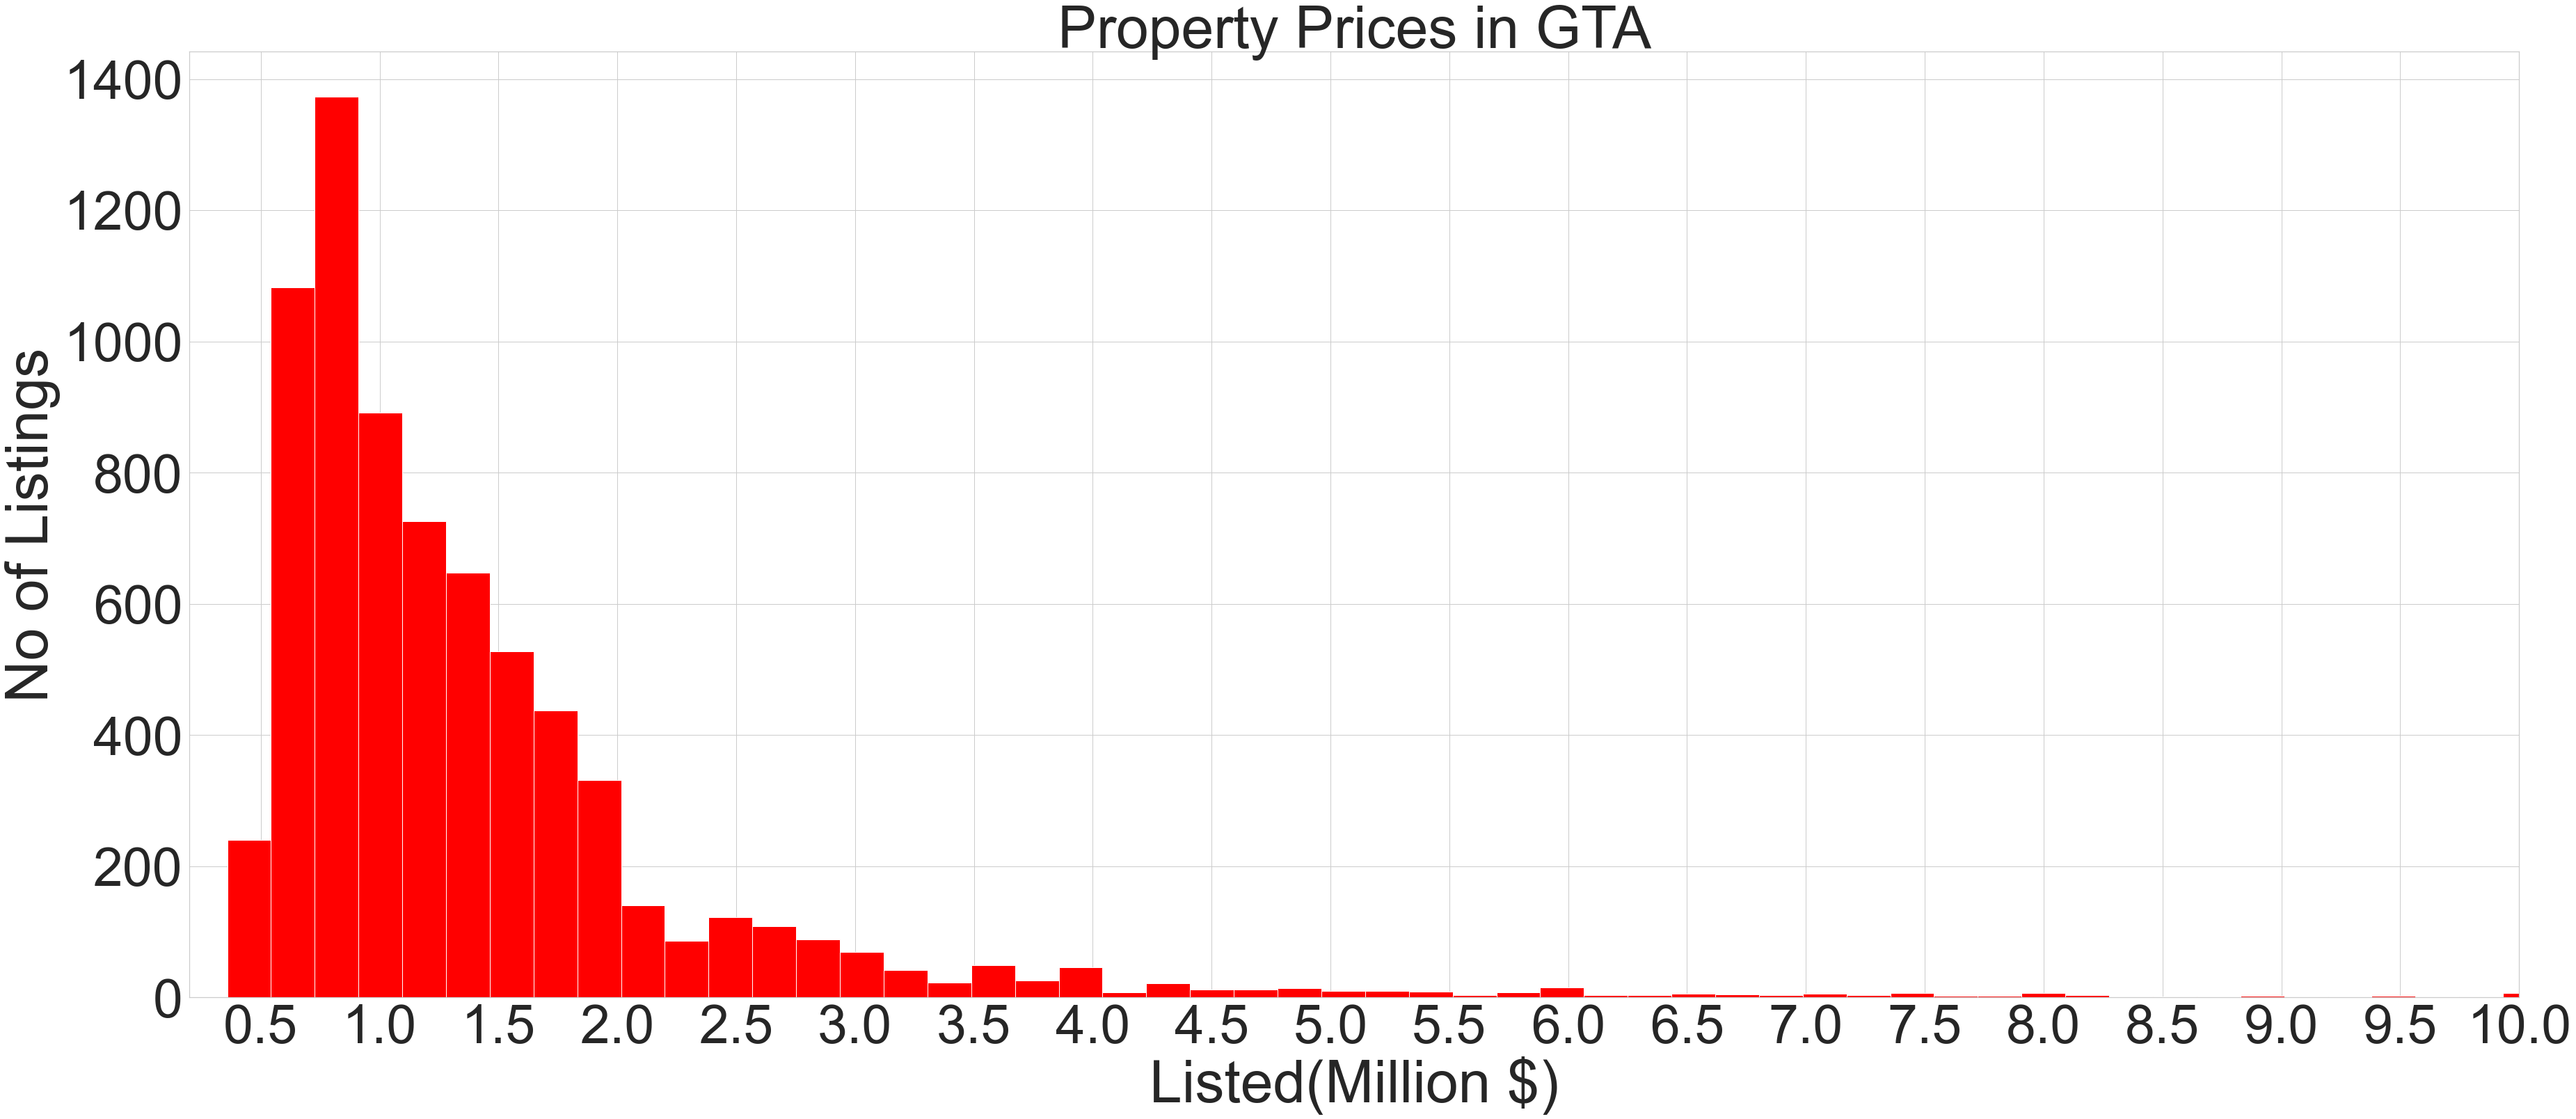

In [25]:

## Listing of the property prices in the millions in respect to the no of listing
sns.set(font_scale= 7)
sns.set_style('whitegrid')
plt.figure(figsize= (60,25))
plt.title('Property Prices in GTA')
sns.distplot(data.pricem, kde = False, color = 'red', hist_kws=dict(alpha=1), bins = 150)
plt.xlabel('Listed(Million $)')
plt.ylabel('No of Listings')
plt.xticks(np.arange(0, 10.5, 0.5))
plt.xlim(0.2, 10);

Sorting of listing in respect of the regions in the GTA

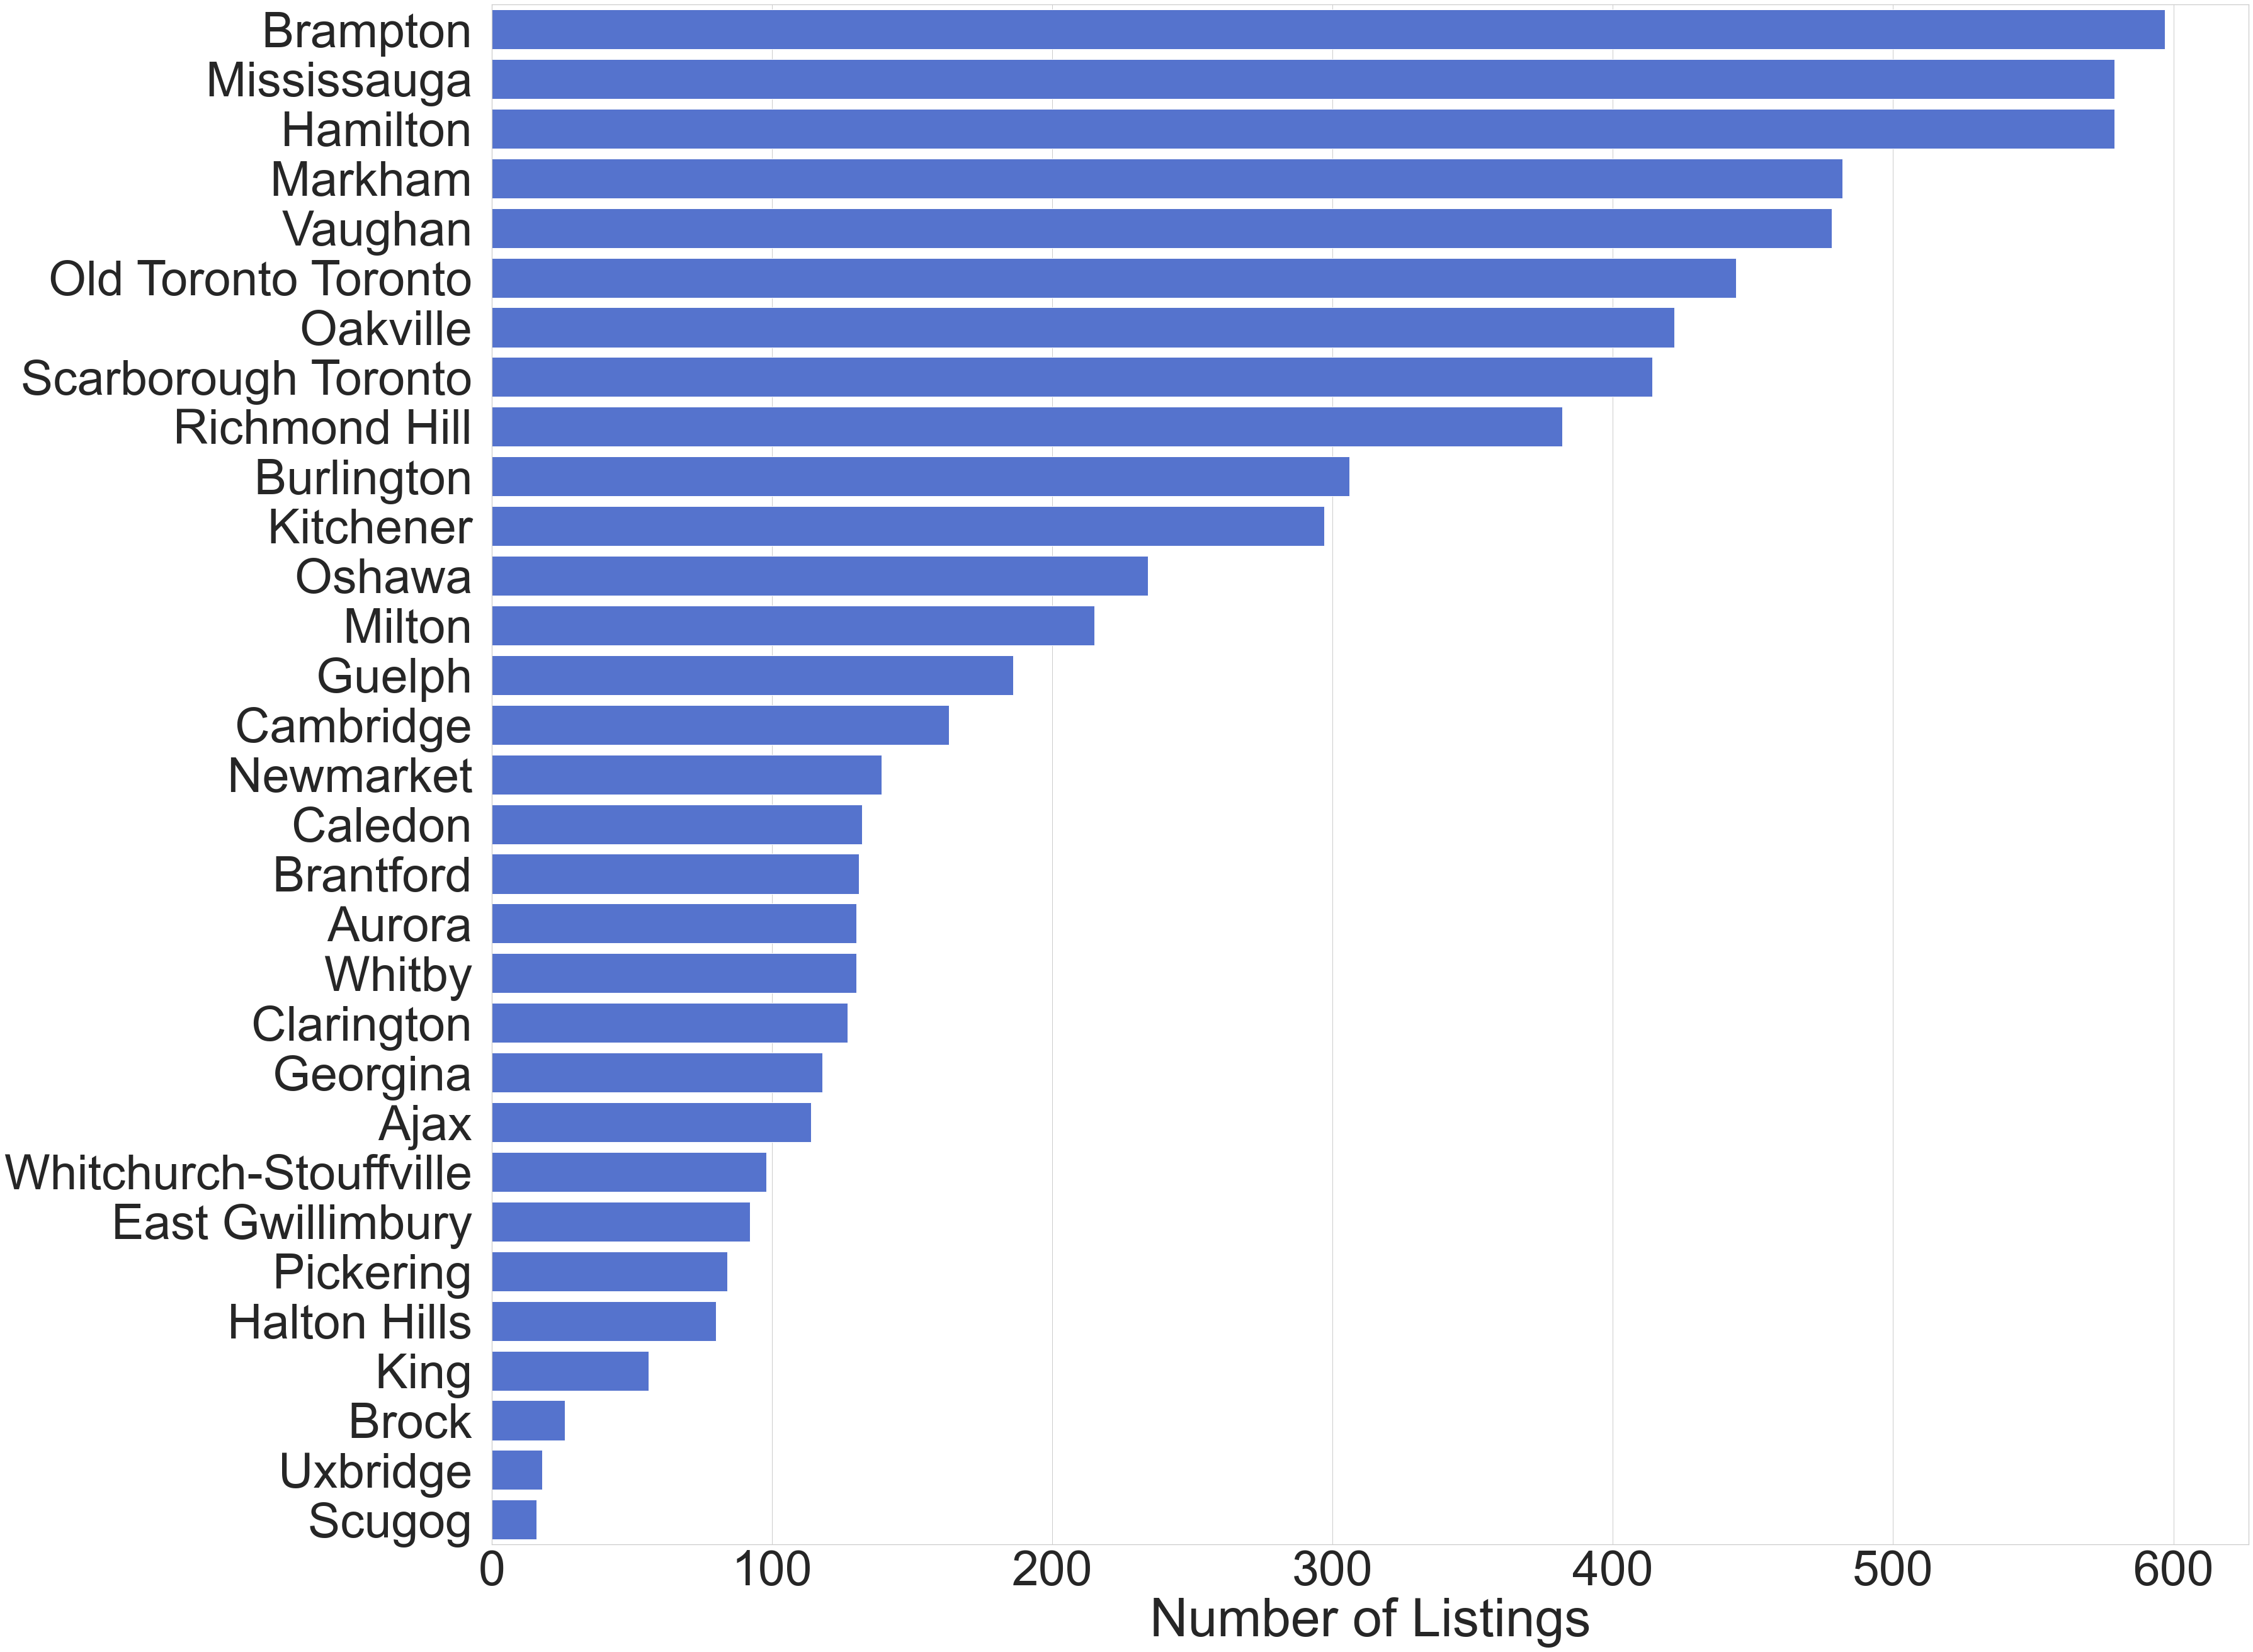

In [26]:
##the sorting of the listing in respect to the regions in the GTA 

order = region_listing.sort_values(by = 'no. of listings', ascending= False).region
sns.set(font_scale=7)
sns.set_style('whitegrid')
plt.figure(figsize= (50,45))
sns.barplot(data= region_listing, y = 'region', x = 'no. of listings', order = order, color= 'royalblue')
plt.xlabel('Number of Listings')
plt.ylabel('')
plt.xticks(np.arange(0, 650, 100));

In [31]:
data_bedrooms = ((data.groupby(by= 'bedrooms').count())[['price']])
data_bedrooms.reset_index(inplace= True)
data_bedrooms.rename(columns= {'price' : 'count'}, inplace= True)
data_bedrooms


data_bathrooms = ((data.groupby(by= 'bathrooms').count())[['price']])
data_bathrooms.reset_index(inplace= True)
data_bathrooms.rename(columns= {'price' : 'count'}, inplace= True)
data_bathrooms

,bathrooms,count
0,1,846
1,2,2050
2,3,1961
3,4,1664
4,5,460
5,6,174
6,7,53
7,8,29
8,9,14
9,10,4


Number of Bedrooms in respect to the no of the listing. 

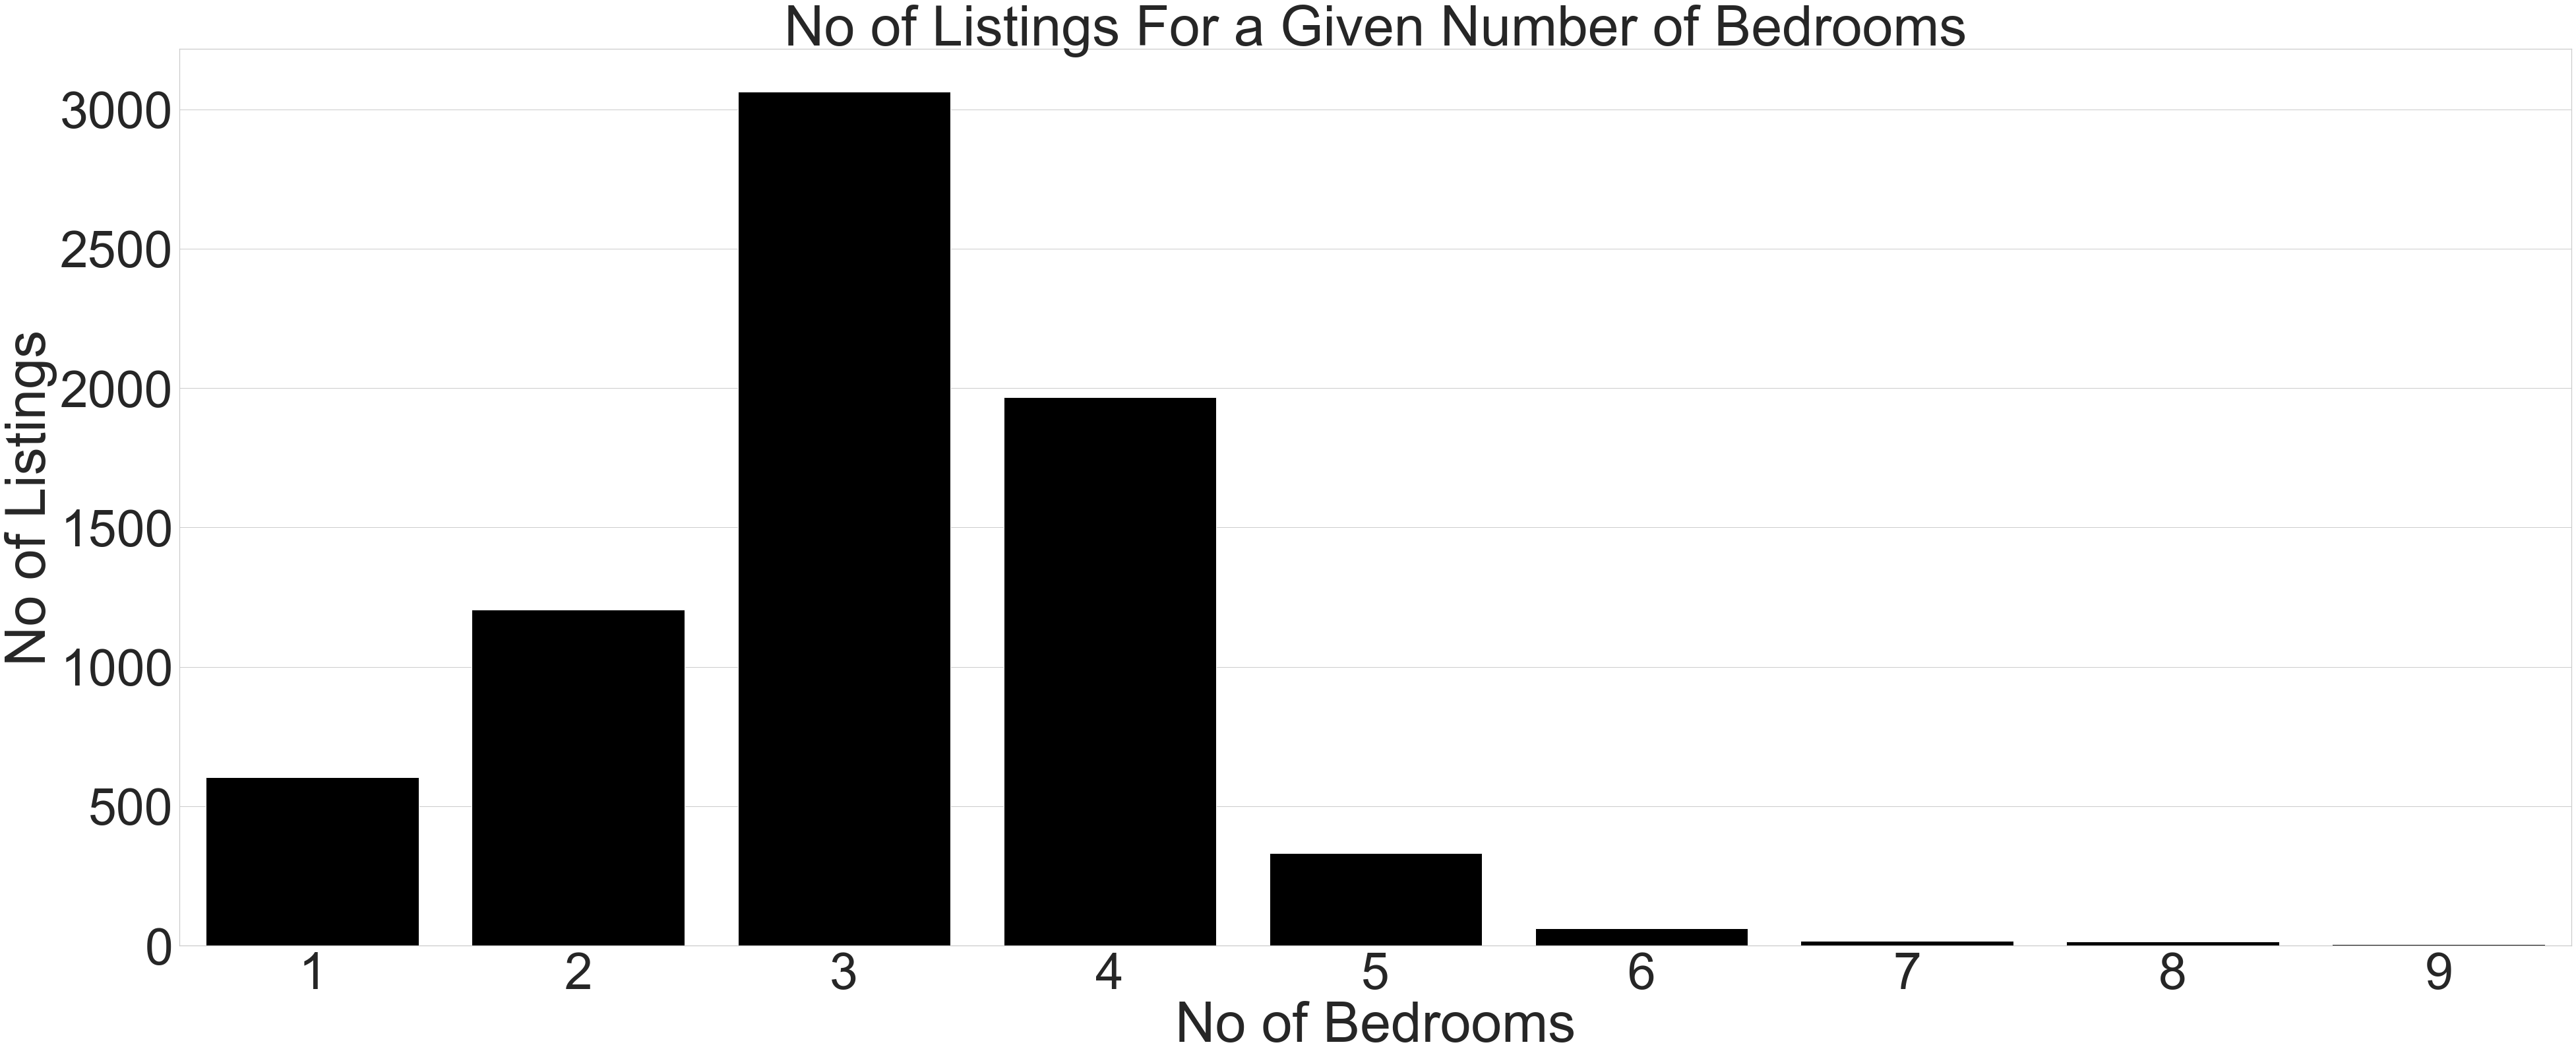

In [35]:
## No of the bedrooms in respect to the no of the listing.

sns.set(font_scale=7)
sns.set_style('whitegrid')
plt.figure(figsize= (65,25))
sns.barplot(data = data_bedrooms, x = 'bedrooms', y ='count', color = 'black', alpha = 1)
plt.xlabel('No of Bedrooms')
plt.ylabel('No of Listings')
plt.title('No of Listings For a Given Number of Bedrooms');

No of the bathrooms in respect to the no of the listing. 

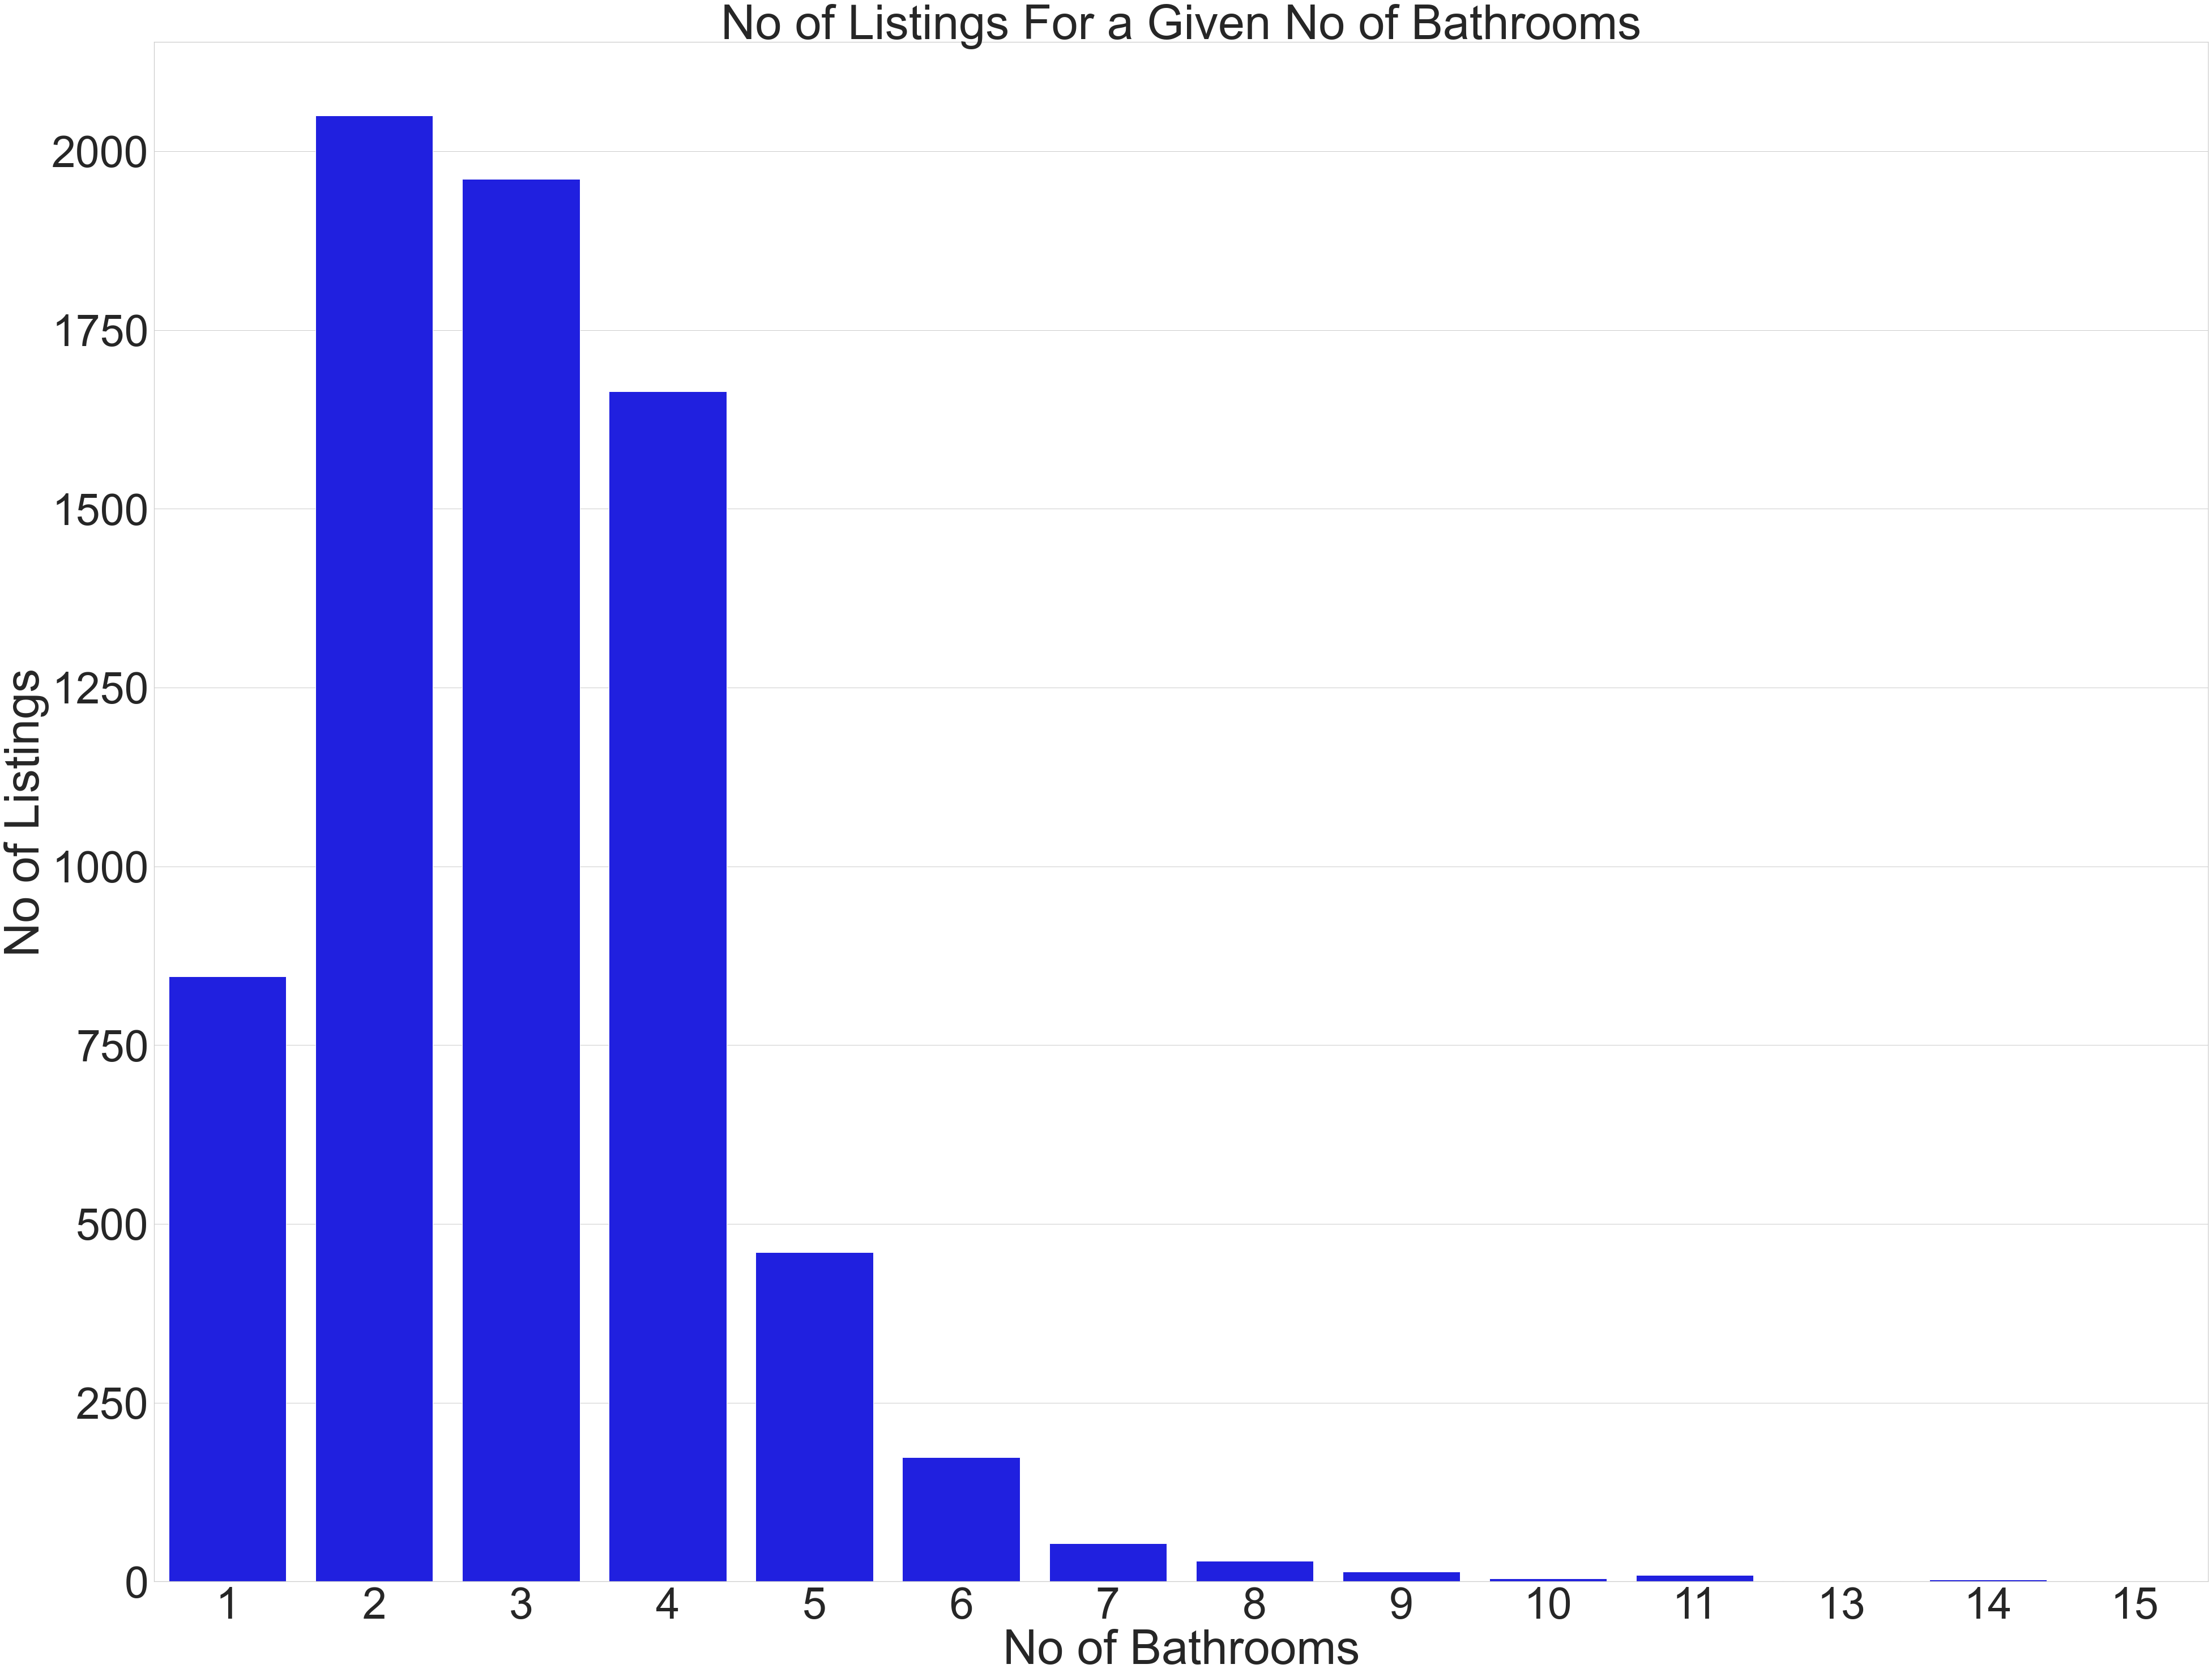

In [39]:
## no of  listing for given no of bathrooms
sns.set(font_scale=7)
sns.set_style('whitegrid')
plt.figure(figsize= (65,50))
sns.barplot(data = data_gr_bathrooms, x = 'bathrooms', y ='count', color = 'blue', alpha = 1)
plt.xlabel('No of Bathrooms')
plt.ylabel('No of Listings')
plt.title('No of Listings For a Given No of Bathrooms');